I saw a post about the effect President Trump has had on the economy:

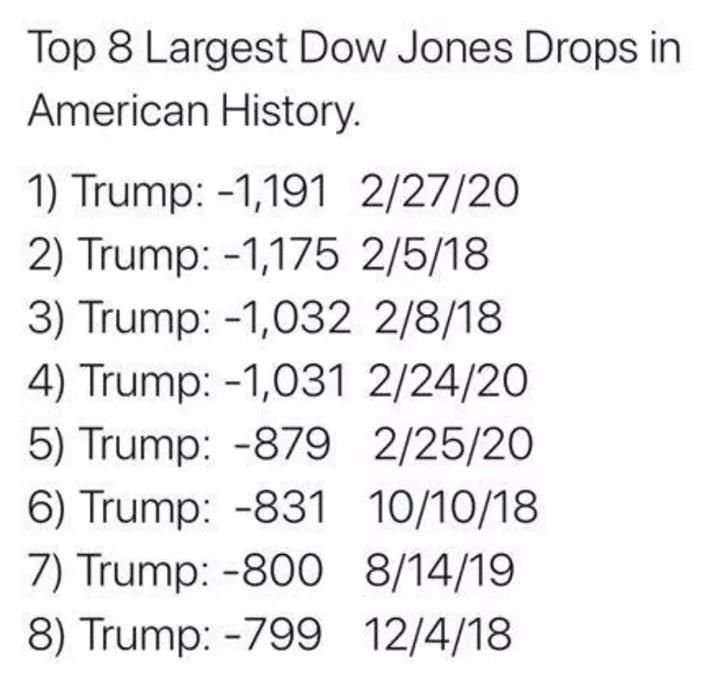

I got curious, so I went and got daily Dow Jones prices from [Yahoo! Finance](https://web.archive.org/save/https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1583280000&interval=1d&filter=history&frequency=1d) and decided to have a look (**starting in January 29, 1985 and ending March 6, 2020**, as that was the data I could quickly find freely available).

First, let's take a look at the data.

In [124]:
# data from Yahoo! Finance
data = read.csv("DJI.csv")
head(data)

Date,Open,High,Low,Close,Adj.Close,Volume
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985-01-29,1277.72,1295.49,1266.89,1292.62,1292.62,13560000
1985-01-30,1297.37,1305.10,1278.93,1287.88,1287.88,16820000
1985-01-31,1283.24,1293.40,1272.64,1286.77,1286.77,14070000
1985-02-01,1276.94,1286.11,1269.77,1277.72,1277.72,10980000
1985-02-04,1272.08,1294.94,1268.99,1290.08,1290.08,11630000
1985-02-05,1294.06,1301.13,1278.60,1285.23,1285.23,13800000


So, what we see is the date and a few different statistics about the price throughout the day. 

From Yahoo!: \*Close price adjusted for splits. \*\*Adjusted close price adjusted for both dividends and splits.

I decided to go with closing price as that seemed most plausible although I'd imagine we'd get similar stories in any case.

Let's look at the original post: what are the eight days with the biggest loss on the Dow Jones?

**UPDATE 3/9/2020** I'm going to expand it to top 10, because the Dow Jones has taken a heavy beating the past week.

In [125]:
# Look at one-day differences
oneDayCloseDiff = diff(data$Close)
# Determine where the large jumps were
idxs = order(oneDayCloseDiff)

data.frame(date=data$Date[idxs[1:10] + 1], diff=oneDayCloseDiff[idxs[1:10]])

date,diff
<fct>,<dbl>
2020-02-27,-1190.9492
2018-02-05,-1175.2109
2018-02-08,-1032.8887
2020-02-24,-1031.6094
2020-03-05,-969.5801
2020-02-25,-879.4414
2018-10-10,-831.8301
2019-08-14,-800.4902
2018-12-04,-799.3594


And we recover the same days! I attribute differences in exact value mostly to rounding, although mabye they used a different daily price statistic like the high point of the day. Close enough for me though.

**UPDATE 3/9/2020** There's a new lowest day, March 5, 2020, hence the difference in lists now.

Now, I want to label each one with the appropriate president, anticipating the analysis below, and labeling the president on the top 10 drops.

In [126]:
# First, let's build up the appropriate ranges
d = as.Date(data$Date[2:length(data$Date)])
reagan = (d >= as.Date('1981-01-20')) & (d < as.Date('1989-01-20'))
hwbush = (d >= as.Date('1989-01-20')) & (d < as.Date('1993-01-20'))
clinton = (d >= as.Date('1993-01-20')) & (d < as.Date('2001-01-20'))
wbush = (d >= as.Date('2001-01-20')) & (d < as.Date('2009-01-20'))
obama = (d >= as.Date('2009-01-20')) & (d < as.Date('2017-01-20'))
trump = d >= as.Date('2017-01-20')

date_map = list("Reagan"= reagan, "H.W. Bush"= hwbush, "Clinton"= clinton, "W. Bush"= wbush, "Obama"= obama, "Trump"= trump)

In [127]:
# Look at one-day differences
oneDayCloseDiff = diff(data$Close)
# Determine where the large jumps were
idxs = order(oneDayCloseDiff)

presidents = c(1:10)
for (i in 1:10){
    for (n in names(date_map)) {
        if (date_map[[n]][idxs[i] + 1]) {
            presidents[i] = n
        }
    }
}

data.frame(date=data$Date[idxs[1:10] + 1], diff=oneDayCloseDiff[idxs[1:10]], pres=presidents)

date,diff,pres
<fct>,<dbl>,<fct>
2020-02-27,-1190.9492,Trump
2018-02-05,-1175.2109,Trump
2018-02-08,-1032.8887,Trump
2020-02-24,-1031.6094,Trump
2020-03-05,-969.5801,Trump
2020-02-25,-879.4414,Trump
2018-10-10,-831.8301,Trump
2019-08-14,-800.4902,Trump
2018-12-04,-799.3594,Trump


But is that the full story? Let's visualize the closing price over time.

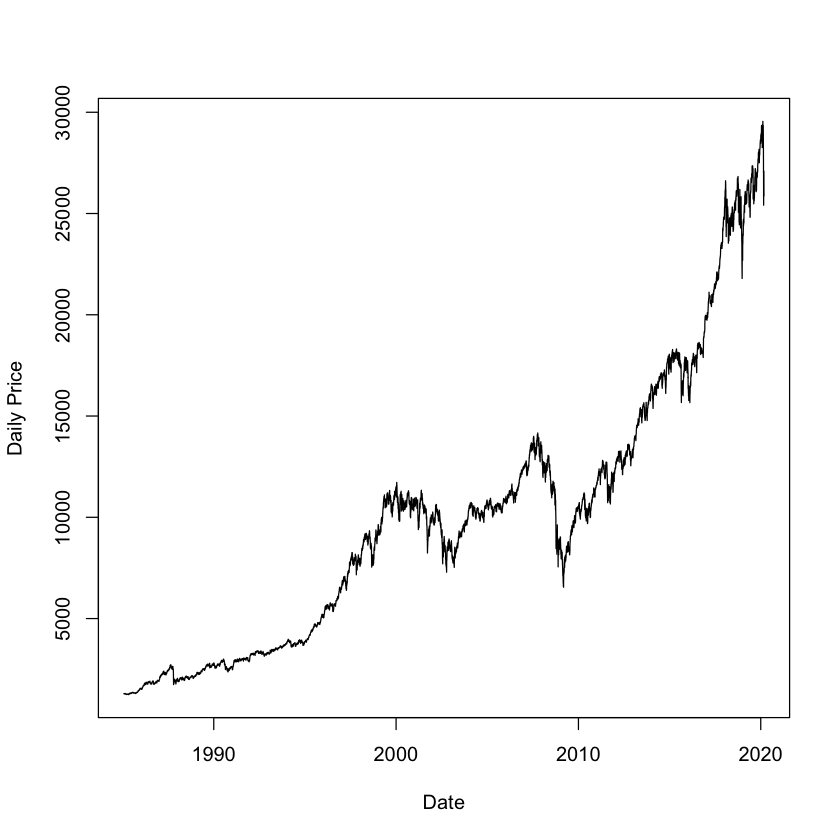

In [128]:
plot(as.Date(data$Date), data$Close, type='l', xlab="Date", ylab="Daily Price")

Thus we see the typical up-and-to-the-right vaguely-exponential curve we'd expect long-term on the stock market. But something interesting happens if we instead visualize the differences, rather than the price on its own:

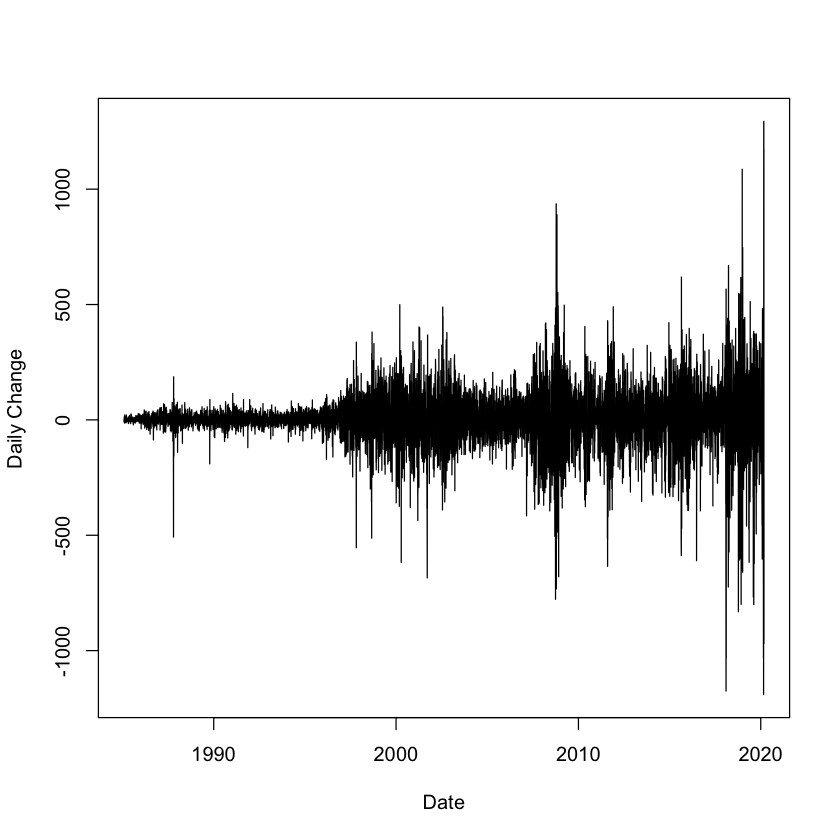

In [129]:
plot(as.Date(data$Date[2:length(data$Date)]), oneDayCloseDiff, type='l', xlab="Date", ylab="Daily Change")

Interesting! What I see there is a tendency for larger differences over time. And in fact, we can see something even more interesting if we instead look at the *percent difference* rather than the absolute difference:

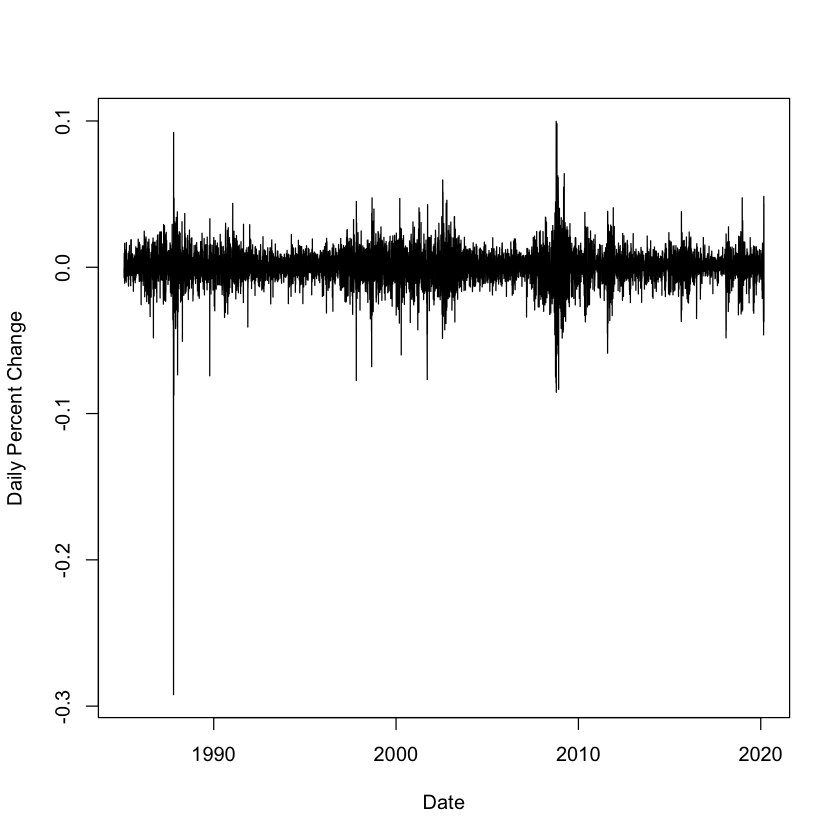

In [130]:
oneDayClosePercentDiff = diff(data$Close) / data$Close[2:length(data$Close)]
plot(as.Date(data$Date[2:length(data$Date)]), oneDayClosePercentDiff, type='l', xlab="Date", ylab="Daily Percent Change")

So, save for a few times of marked volatility, I see mostly that the percent change roughly behaves the same all the time. What I don't see is that the percent change seems to have varied all that much in the past few years relative to other points in history.

In particular, we can color-code by president (Reagan in dark red to see the difference between him and H. W. Bush):

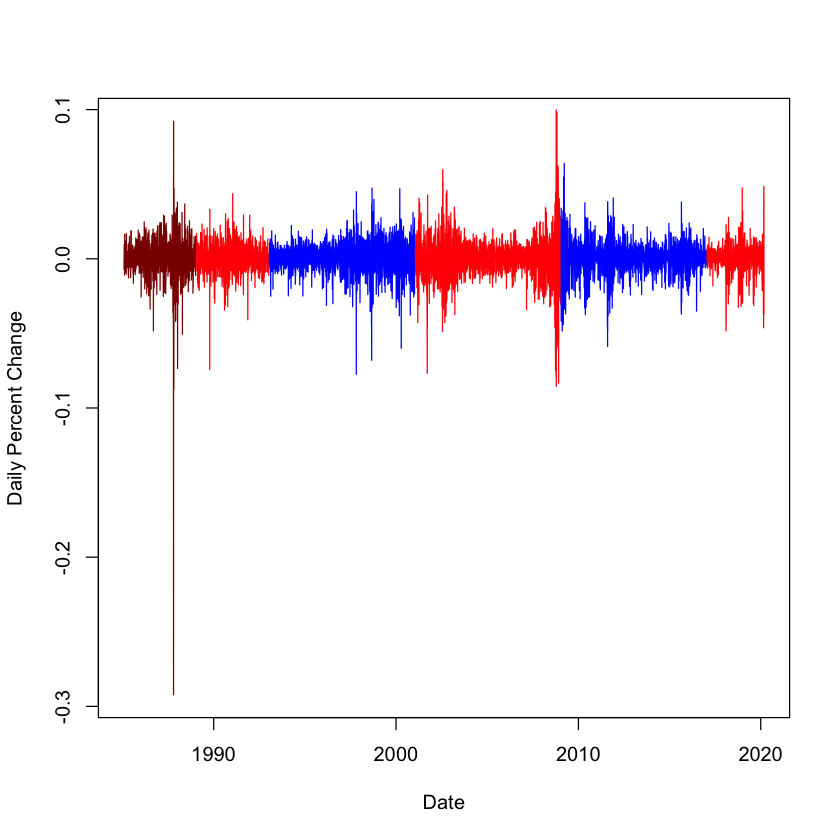

In [131]:
plot(d[reagan], oneDayClosePercentDiff[reagan], type='l', col='darkred', xlim=c(d[1], d[length(d)]), xlab="Date", ylab="Daily Percent Change")
lines(d[hwbush], oneDayClosePercentDiff[hwbush], type='l', col='red')
lines(d[clinton], oneDayClosePercentDiff[clinton], type='l', col='blue')
lines(d[wbush], oneDayClosePercentDiff[wbush], type='l', col='red')
lines(d[obama], oneDayClosePercentDiff[obama], type='l', col='blue')
lines(d[trump], oneDayClosePercentDiff[trump], type='l', col='red')

And now I think we're ready to come full circle and answer some questions that I think are just as relevant as "which days were the single biggest drops?":

* Which days were the single highest increases?
* Which days were the single highest percent decreases?
* Which days were the single highest percent increases?

So for the biggest increases, keeping with the meme's "top 8" method, we have:

In [132]:
# Single highest increases
idxs = order(oneDayCloseDiff, decreasing = TRUE)
# After analysis...
presidents = c(1:10)
for (i in 1:10){
    for (n in names(date_map)) {
        if (date_map[[n]][idxs[i] + 1]) {
            presidents[i] = n
        }
    }
}

data.frame(date=data$Date[idxs[1:10] + 1], diff=oneDayCloseDiff[idxs[1:10]], pres=presidents)

date,diff,pres
<fct>,<dbl>,<fct>
2020-03-02,1293.9609,Trump
2020-03-04,1173.4492,Trump
2018-12-26,1086.2500,Trump
2008-10-13,936.4199,W. Bush
2008-10-28,889.3501,W. Bush
2019-01-04,746.9395,Trump
2018-03-26,669.4004,Trump
2015-08-26,619.0693,Obama
2018-11-28,617.6992,Trump


And now for worst days by percentage, we have:

In [133]:
# Worst percent difference
idxs = order(oneDayClosePercentDiff)
# After analysis...
presidents = c(1:10)
for (i in 1:10){
    for (n in names(date_map)) {
        if (date_map[[n]][idxs[i] + 1]) {
            presidents[i] = n
        }
    }
}

data.frame(date=data$Date[idxs[1:10] + 1], diff=oneDayClosePercentDiff[idxs[1:10]], pres=presidents)

date,diff,pres
<fct>,<dbl>,<fct>
1987-10-19,-0.29215984,Reagan
1987-10-26,-0.08742256,Reagan
2008-10-15,-0.08546138,W. Bush
2008-12-01,-0.08343879,W. Bush
2008-10-09,-0.07913441,W. Bush
1997-10-27,-0.07738922,Clinton
2001-09-17,-0.07676635,W. Bush
2008-09-29,-0.07502614,W. Bush
1989-10-13,-0.07417703,H.W. Bush


So we see [Black Monday](https://en.wikipedia.org/wiki/Black_Monday_(1987)), the recession, a [mini-crash](https://en.wikipedia.org/wiki/October_27,_1997,_mini-crash), and the aftermath of 9-11 once the market reopened.

And finally the best days by percentage:

In [134]:
# Best percent difference
idxs = order(oneDayClosePercentDiff, decreasing = TRUE)
presidents = c(1:10)
for (i in 1:10){
    for (n in names(date_map)) {
        if (date_map[[n]][idxs[i] + 1]) {
            presidents[i] = n
        }
    }
}

data.frame(date=data$Date[idxs[1:10] + 1], diff=oneDayClosePercentDiff[idxs[1:10]], pres=presidents)

date,diff,pres
<fct>,<dbl>,<fct>
2008-10-13,0.09975062,W. Bush
2008-10-28,0.09810682,W. Bush
1987-10-21,0.09213698,Reagan
2009-03-23,0.06397749,Obama
2008-11-13,0.06254377,W. Bush
2008-11-21,0.06140990,W. Bush
2002-07-24,0.05969148,W. Bush
1987-10-20,0.05555104,Reagan
2009-03-10,0.05478105,Obama


While obviously the absolute jumps in the stock market are relevant, I think the percent change is at least just as valid of a metric, if not slightly more so. Sure, Trump can claim 8/8 (**UPDATE: 10/10**) of the worst days by absolute change of the Dow Jones, but he also can claim 5/8 (**UPDATE: 7/10**) of the top days. The major percent difference days seem to be congregated around interpretable times (although some of the best percent difference days seem clustered around those same times).

Anyway, I don't have a particular point, I was mainly curious, but it is interesting that we haven't seen a percentage change that makes the top 8 over the course of a day since 2009.